In [291]:
# Nurtas Serikkanov
import pandas as pd

data = pd.read_csv('gym_members_exercise_tracking.csv')
print(data.head())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

In [292]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [293]:
print(data.isnull().sum())
# data_cleaned = data.dropna()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


In [294]:
# One-Hot Encoding
data = pd.get_dummies(data, drop_first=True)
print(data.head())

   Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56         88.3        1.71      180      157           60   
1   46         74.9        1.53      179      151           66   
2   32         68.1        1.66      167      122           54   
3   25         53.2        1.70      190      164           56   
4   38         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.69           1313.0            12.6   
1                      1.30            883.0            33.9   
2                      1.11            677.0            33.4   
3                      0.59            532.0            28.8   
4                      0.64            556.0            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4         

In [295]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
d_scaled = scaler.fit_transform(data)
data = pd.DataFrame(d_scaled, columns=data.columns)
print(data)
print(data.columns)

          Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0    1.422343     0.681493   -0.098545  0.010081  0.922970    -0.303555   
1    0.600965     0.049316   -1.508604 -0.076726  0.504494     0.515749   
2   -0.548964    -0.271491   -0.490228 -1.118414 -1.518142    -1.122858   
3   -1.123928    -0.974433   -0.176881  0.878155  1.411193    -0.849757   
4   -0.056137    -1.309393    0.528148  0.704540  0.992716     0.788850   
..        ...          ...         ...       ...       ...          ...   
968 -1.206066     0.624880    0.136465  0.617733  0.992716     0.652299   
969 -1.123928    -0.342257   -0.881911  0.357311  1.550685    -0.849757   
970  1.668756    -0.634756    0.293138  1.225384 -1.657634    -1.259409   
971 -0.548964     2.478951    0.841495  1.572614  0.155764    -0.030454   
972  0.600965     0.700363   -0.725238 -1.205221  0.155764     0.515749   

     Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                    1.264598    

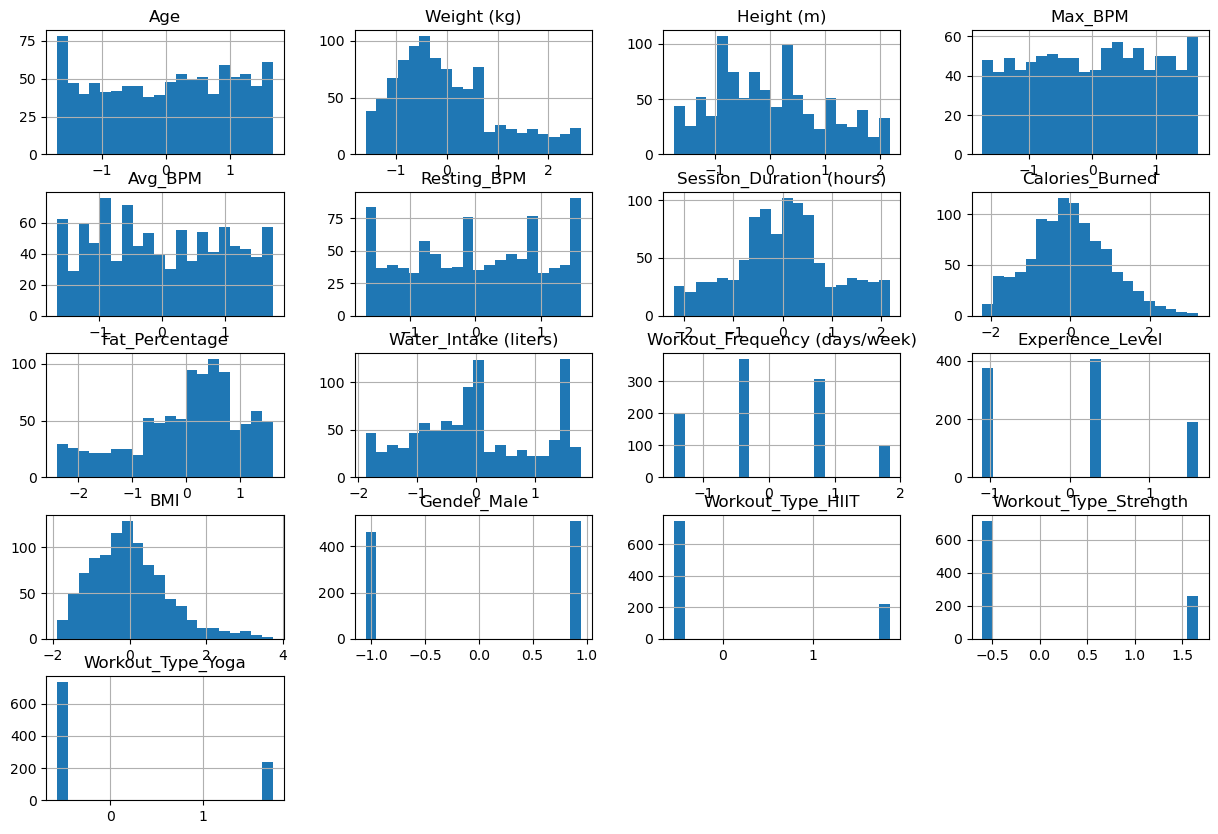

In [296]:
import matplotlib.pyplot as plt

data.hist(bins=20, figsize=(15, 10)) #20 часть, каждый таблица 20 деңгейге
plt.show()

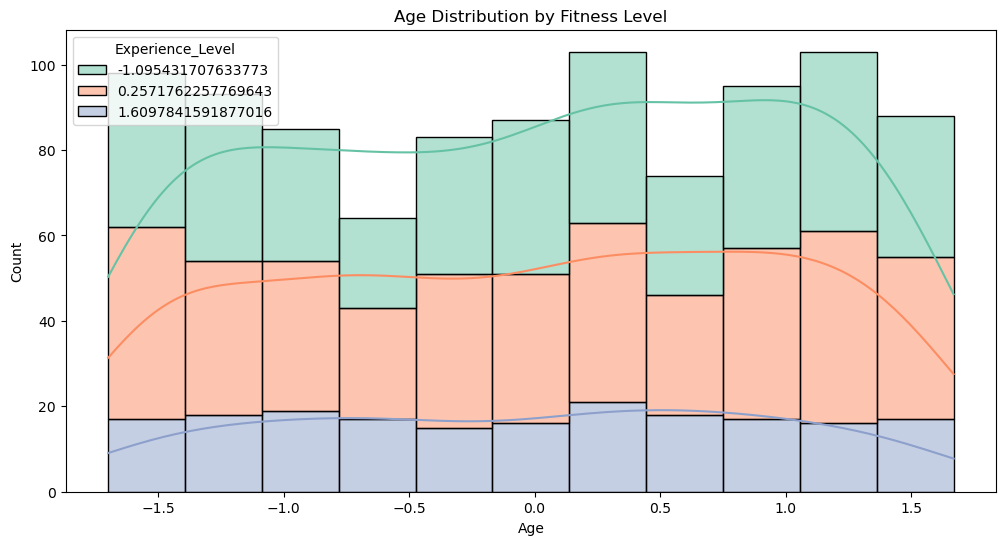

/var/folders/hh/x40rf_2x0qb0zplkf5h66r_c0000gn/T/ipykernel_27316/1654988317.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Experience_Level', y='Age', palette='Set2')


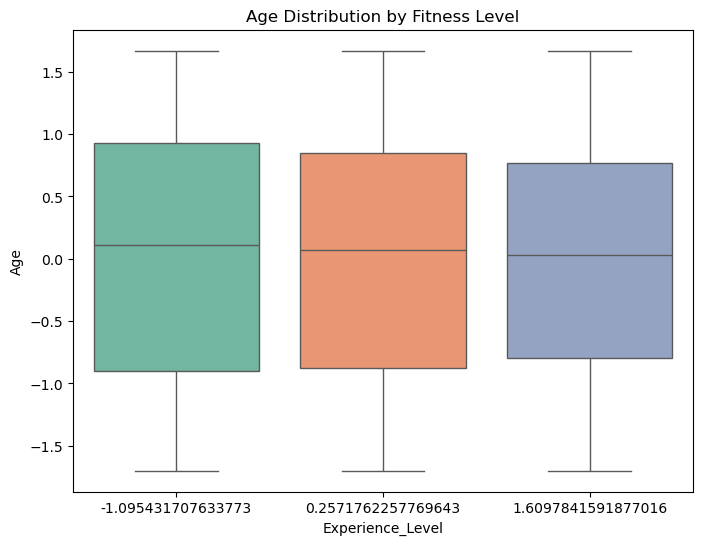

In [297]:
import seaborn as sns

plt.figure(figsize=(12, 6))

sns.histplot(data=data, x='Age', hue='Experience_Level', kde=True, palette='Set2', multiple="stack")
plt.title('Age Distribution by Fitness Level')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Experience_Level', y='Age', palette='Set2')
plt.title('Age Distribution by Fitness Level')
plt.xlabel('Experience_Level')
plt.ylabel('Age')
plt.show()

Workout_Type_HIIT       -0.542110
Workout_Type_Strength   -0.600699
Workout_Type_Yoga       -0.570625
dtype: float64


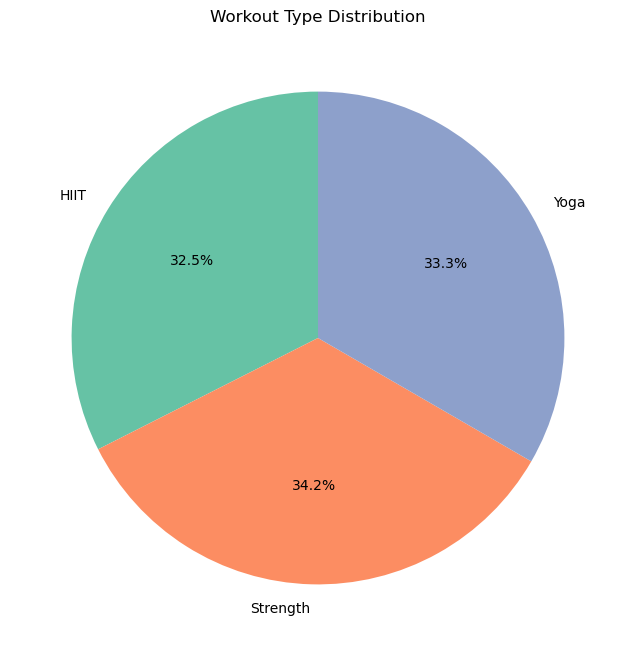

In [298]:
print(data[['Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']].min())

data[['Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']] = data[['Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']].clip(lower=0)

workout_counts = {
    'HIIT': data['Workout_Type_HIIT'].sum(),
    'Strength': data['Workout_Type_Strength'].sum(),
    'Yoga': data['Workout_Type_Yoga'].sum()
}

plt.figure(figsize=(8, 8))
plt.pie(workout_counts.values(), labels=workout_counts.keys(), autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title('Workout Type Distribution')
plt.show()


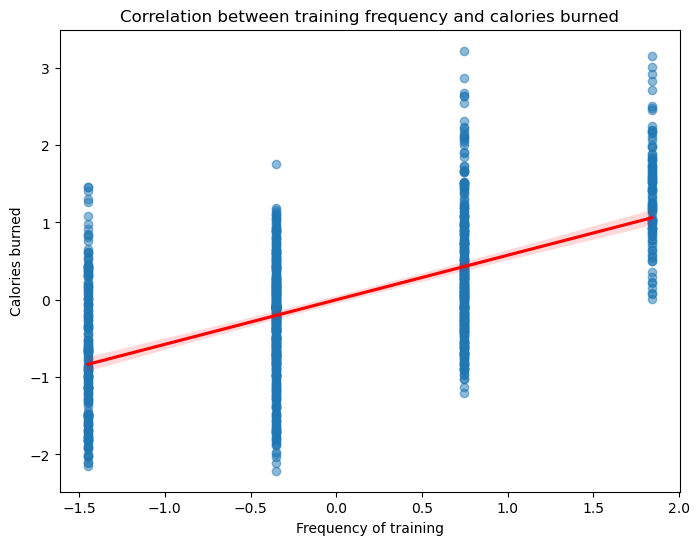

In [299]:
plt.figure(figsize=(8, 6))

sns.regplot(data=data, x='Workout_Frequency (days/week)', y='Calories_Burned', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation between training frequency and calories burned')
plt.xlabel('Frequency of training')
plt.ylabel('Calories burned')
plt.show()

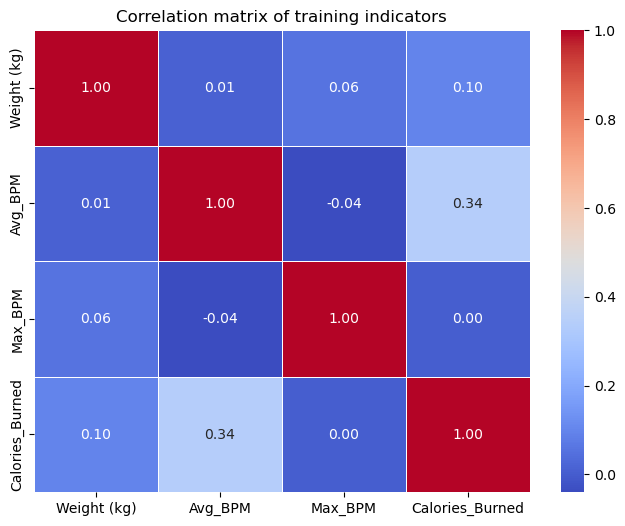

In [300]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data[['Weight (kg)', 'Avg_BPM', 'Max_BPM', 'Calories_Burned']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation matrix of training indicators')
plt.show()

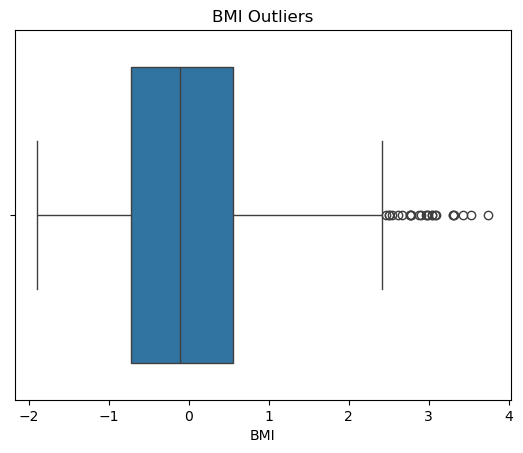

In [301]:
sns.boxplot(x='BMI', data=data)
plt.title('BMI Outliers')
plt.show()

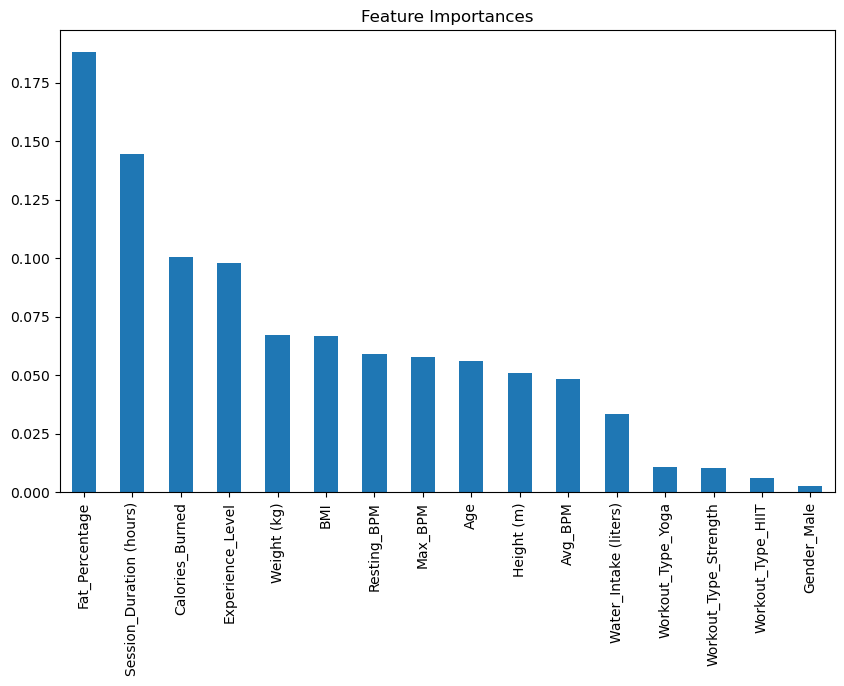

ValueError: could not convert string to float: 'Low'

In [308]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Workout_Frequency (days/week)'])
y = data['Workout_Frequency (days/week)']

bins = [0, 1, 4, 7, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
y_cat = pd.cut(y, bins=bins, labels=labels, include_lowest=True)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_cat, test_size=0.2, random_state=42)

Xtrain = Xtrain[~ytrain.isna()]
ytrain = ytrain.dropna()

Xtest = Xtest[~ytest.isna()]
ytest = ytest.dropna()

scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

model = RandomForestClassifier(random_state=42)
model.fit(Xtrain, ytrain)

importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

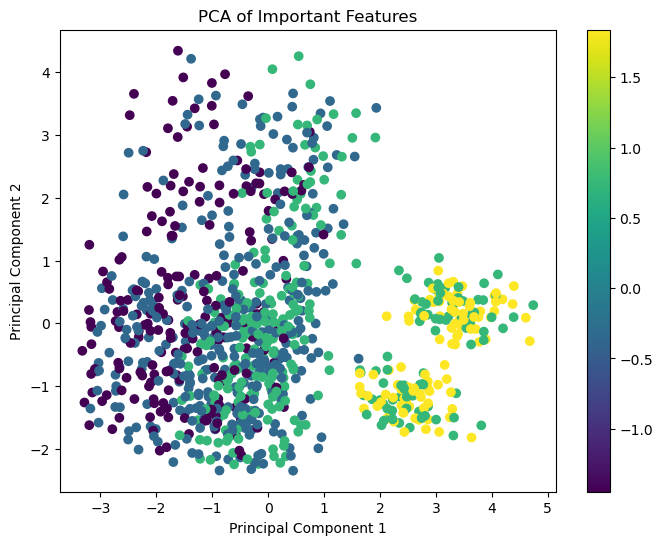

In [303]:
from sklearn.decomposition import PCA

important_features = feature_importances[feature_importances > 0.05].index 
X_important = X[important_features]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_important)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis') 
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Important Features')
plt.colorbar()
plt.show()

Logistic Regression:
Accuracy: 0.7951807228915663
Precision: 0.8143261304326618
Recall: 0.7951807228915663
Classification Report:
               precision    recall  f1-score   support

         Low       0.89      0.82      0.86        62
      Medium       0.58      0.71      0.64        21

    accuracy                           0.80        83
   macro avg       0.74      0.77      0.75        83
weighted avg       0.81      0.80      0.80        83


Decision Tree:
Accuracy: 0.8072289156626506
Precision: 0.8017398541534558
Recall: 0.8072289156626506
Classification Report:
               precision    recall  f1-score   support

         Low       0.86      0.89      0.87        62
      Medium       0.63      0.57      0.60        21

    accuracy                           0.81        83
   macro avg       0.75      0.73      0.74        83
weighted avg       0.80      0.81      0.80        83



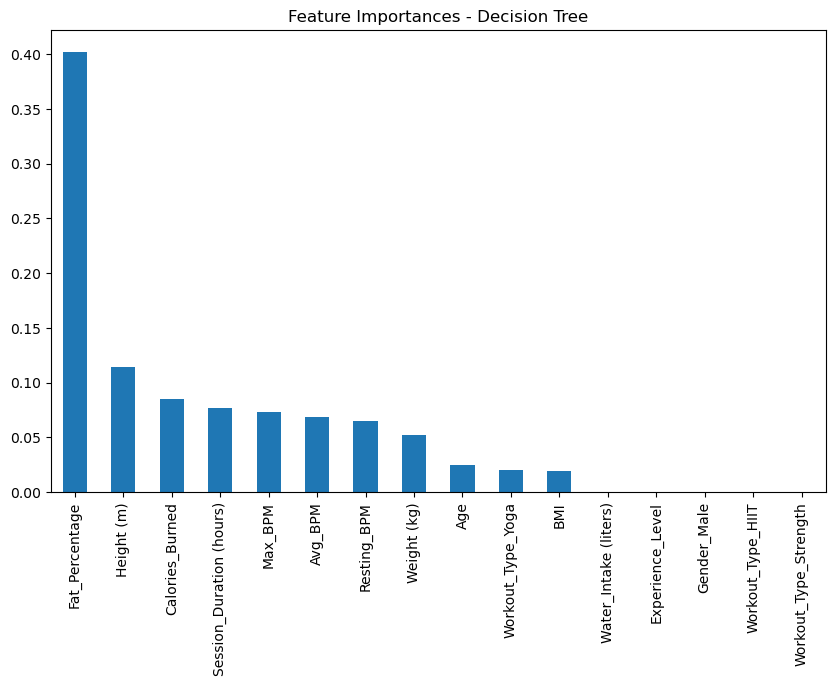

In [304]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

logreg = LogisticRegression(random_state=42)
logreg.fit(Xtrain_scaled, ytrain)

# Предсказание
y_pred_logreg = logreg.predict(Xtest_scaled)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(ytest, y_pred_logreg))
print("Precision:", precision_score(ytest, y_pred_logreg, average='weighted'))
print("Recall:", recall_score(ytest, y_pred_logreg, average='weighted'))
print("Classification Report:\n", classification_report(ytest, y_pred_logreg))

dt = DecisionTreeClassifier(random_state=42)
dt.fit(Xtrain_scaled, ytrain)

# Предсказание
y_pred_dt = dt.predict(Xtest_scaled)

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt))
print("Precision:", precision_score(ytest, y_pred_dt, average='weighted'))
print("Recall:", recall_score(ytest, y_pred_dt, average='weighted'))
print("Classification Report:\n", classification_report(ytest, y_pred_dt))

importances = dt.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances - Decision Tree')
plt.show()


In [305]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True),
    "Neural Network": MLPClassifier(random_state=42)
}

results = {}

for name, clf in classifiers.items():
    clf.fit(Xtrain_scaled, ytrain)
    y_pred = clf.predict(Xtest_scaled)
    
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred, average='weighted')
    recall = recall_score(ytest, y_pred, average='weighted')
    f1 = f1_score(ytest, y_pred, average='weighted')
    
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

results_df = pd.DataFrame(results).T
print(results_df)

best_model_name = results_df['F1 Score'].idxmax()
best_model_score = results_df['F1 Score'].max()

print()
print(f"The best model is: {best_model_name} with an F1 Score of: {best_model_score:.4f}")

                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.795181   0.814326  0.795181  0.801772
K-Nearest Neighbors     0.831325   0.852936  0.831325  0.837579
Random Forest           0.783133   0.798521  0.783133  0.788947
Support Vector Machine  0.771084   0.774783  0.771084  0.772816
Neural Network          0.783133   0.783133  0.783133  0.783133

The best model is: K-Nearest Neighbors with an F1 Score of: 0.8376


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


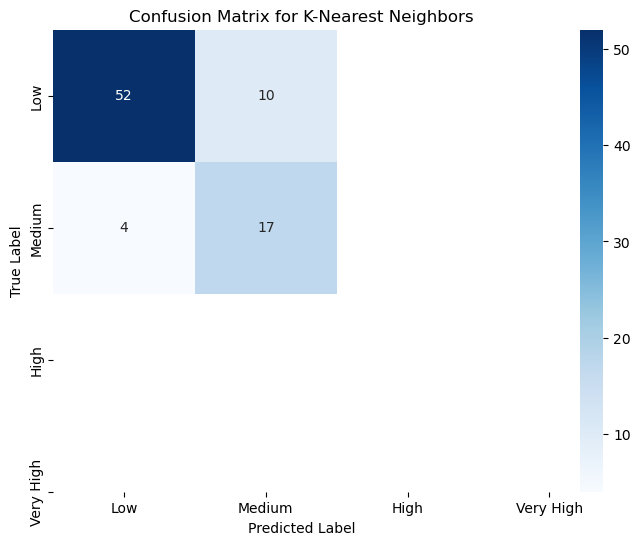

In [306]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

best_model = KNeighborsClassifier()
best_model.fit(Xtrain_scaled, ytrain)
y_pred = best_model.predict(Xtest_scaled)

cm = confusion_matrix(ytest, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High', 'Very High'], yticklabels=['Low', 'Medium', 'High', 'Very High'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()


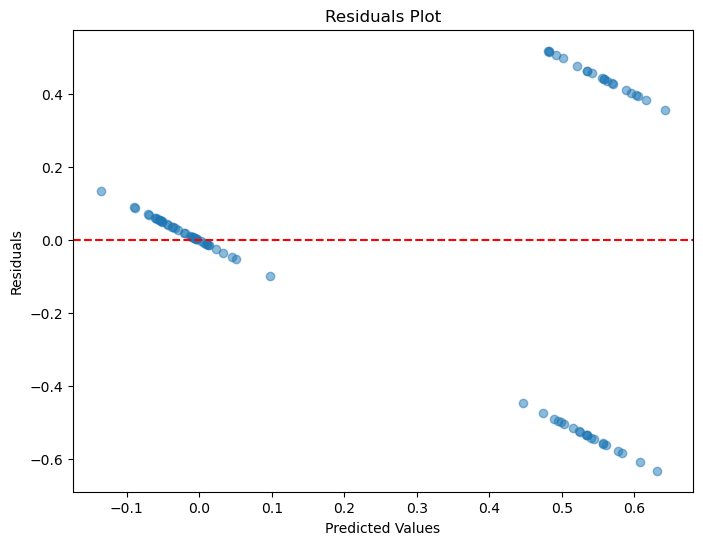

In [312]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_numerical = label_encoder.fit_transform(ytrain)

lin_reg = LinearRegression()
lin_reg.fit(Xtrain_scaled, y_numerical)  # y должен быть числовым

y_pred_reg = lin_reg.predict(Xtest_scaled)

residuals = label_encoder.transform(ytest) - y_pred_reg

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_reg, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
